In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Times New Roman']
plt.style.use('dark_background')
plt.rcParams['text.color'] = 'white'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'
plt.rcParams['axes.edgecolor'] = 'white'
from collections import Counter

In [2]:
data = pd.read_csv('arxiv_papers.csv')

In [3]:
data

,title,abstract,authors,figures,pages,tables,pdf_link,primary_subject,secondary_subjects,submitted_journal,published_journal,keywords,date
0,Insights on Galaxy Evolution from Interpretabl...,Galaxy appearances reveal the physics of how t...,['John F. Wu'],4.0,10.0,2.0,arxiv.org/pdf/2501.00089,Astrophysics of Galaxies,['Machine Learning'],AAS Journals,NaN,"['Galaxies (573)', 'Astronomy image processing...",2025-01-03
1,Hunting for the candidates of Changing-Look Bl...,The changing-look blazars (CLBs) are the blaza...,"['Shi-Ju Kang', 'Shan-Shan Ren', 'Yong-Gang Zh...",7.0,13.0,3.0,arxiv.org/pdf/2501.00094,High Energy Astrophysical Phenomena,NaN,ApJ,NaN,['Active galactic nuclei (16) – Blazars (164) ...,2025-01-03
2,First unambiguous detection of ammonia in the ...,The newly accessible mid-infrared (MIR) window...,"['Mathilde Mâlin', 'Anthony Boccaletti', 'Clém...",6.0,18.0,4.0,arxiv.org/pdf/2501.00104,Earth and Planetary Astrophysics,NaN,A&A,NaN,"['Planetary systems', 'Stars: individual: GJ 5...",2025-01-03
3,Exchange of meteorites between the terrestrial...,The evolution of the orbits of bodies ejected ...,['S.I. Ipatov'],0.0,6.0,0.0,arxiv.org/pdf/2501.00134,Earth and Planetary Astrophysics,NaN,NaN,Modern astronomy: from the Early Universe to e...,['planets and satellites: terrestrial planets'],2025-01-03
4,Autoencoder Reconstruction of Cosmological Mic...,Enhanced modeling of microlensing variations i...,"['Somayeh Khakpash', 'Federica Bianco', 'Georg...",11.0,18.0,1.0,arxiv.org/pdf/2501.00153,Instrumentation and Methods for Astrophysics,NaN,The Astrophysical Journal,NaN,['- Interdisciplinary astronomy(804) 1'],2025-01-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...
530,Advection Algorithms for Quantum Neutrino Mome...,Neutrino transport in compact objects is an in...,"['Evan Grohs', 'Sherwood Richers', 'Julien Fro...",25.0,31.0,0.0,arxiv.org/pdf/2501.07540,High Energy Astrophysical Phenomena,['High Energy Physics - Phenomenology'],NaN,NaN,[],2025-01-14
531,"Compact Size, High $\Sigma$SFR: Defining Morph...",The mechanisms of Ly$\alpha$ photon escape are...,"['Keunho Kim', 'Anahita Alavi', 'Christopher S...",5.0,11.0,1.0,arxiv.org/pdf/2501.07548,Astrophysics of Galaxies,NaN,NaN,NaN,[],2025-01-14
532,Euclid: Optimising tomographic redshift binnin...,We present a simulation-based method to explor...,"['J. H. W. Wong', 'M. L. Brown', 'C. A. J. Dun...",17.0,28.0,1.0,arxiv.org/pdf/2501.07559,Cosmology and Nongalactic Astrophysics,NaN,NaN,NaN,['Cosmology: observations – dark energy – cosm...,2025-01-14
533,A reference framework for extremely metal-poor...,We provide the first reference framework for e...,"['Marta Lorenzo', 'Miriam Garcia', 'Norberto C...",23.0,26.0,2.0,arxiv.org/pdf/2501.07569,Solar and Stellar Astrophysics,['Astrophysics of Galaxies'],NaN,NaN,['stars:massive–stars:early-type–stars:evoluti...,2025-01-14


In [4]:
authors = data['authors'].tolist()
# Flatten the list of authors and count occurrences
all_authors = [author for sublist in authors for author in sublist.split(', ')]
author_counts = Counter(all_authors)

# Find the most common author
most_common_author, count = author_counts.most_common(1)[0]
print(f"The most repeated author is {most_common_author} and they were repeated {count} times.")

The most repeated author is 'J. Carretero' and they were repeated 8 times.


In [5]:
primary_subjects = data['primary_subject'].tolist()
# Flatten the list of primary subjects and count occurrences
all_primary_subjects = [subject for sublist in primary_subjects for subject in sublist.split(', ')]
primary_subject_counts = Counter(all_primary_subjects)

# Find the most common primary subject
most_common_primary_subject, count = primary_subject_counts.most_common(1)[0]
print(f"The most repeated primary subject is {most_common_primary_subject} and it was repeated {count} times.")

The most repeated primary subject is Astrophysics of Galaxies and it was repeated 121 times.


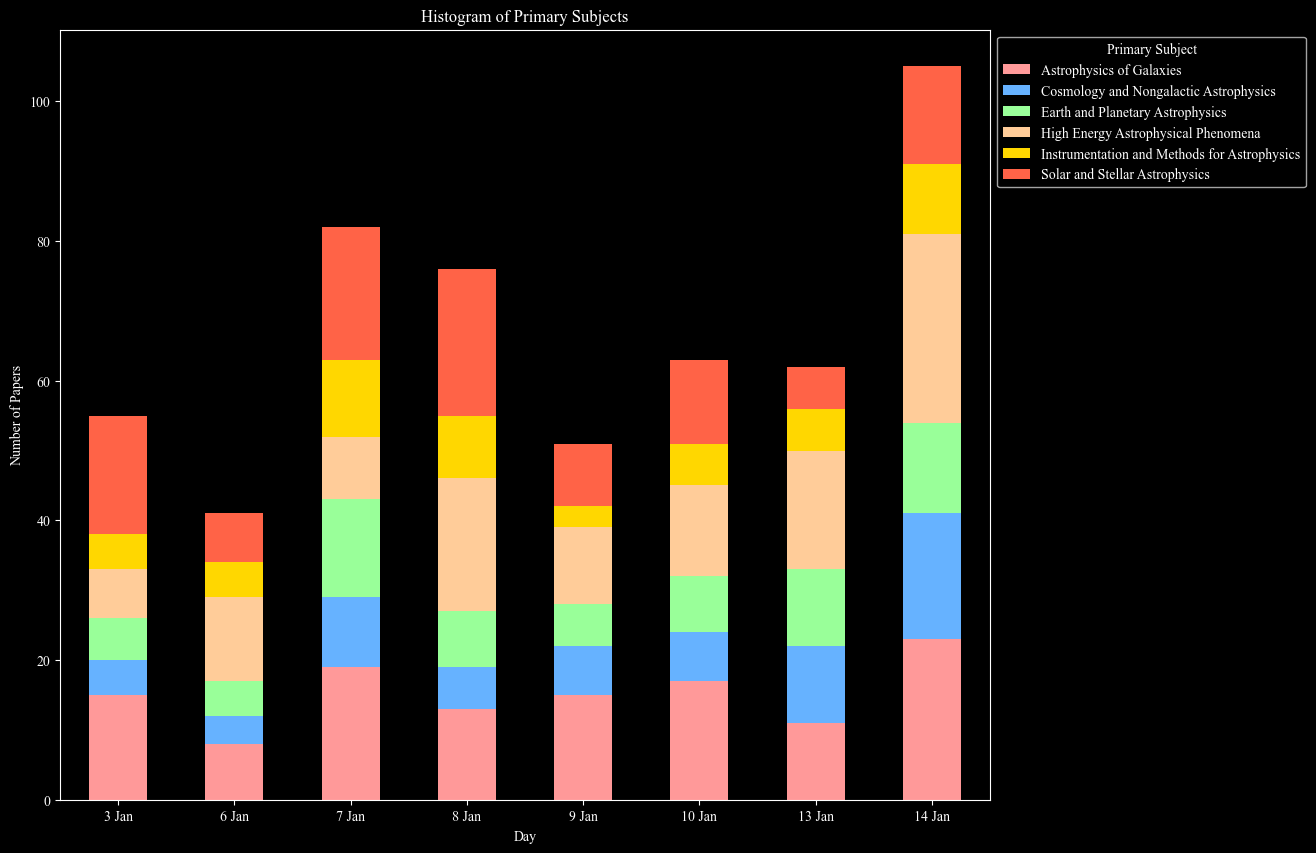

In [6]:
data['date'] = pd.to_datetime(data['date'])
data['day'] = data['date'].dt.day
data['month'] = data['date'].dt.strftime('%b')

subject_counts_per_day = data.groupby(['day', 'primary_subject']).size().unstack(fill_value=0)

colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FFD700', '#FF6347']

subject_counts_per_day.plot(kind='bar', stacked=True, figsize=(12, 10), color=colors)
plt.xlabel('Day')
plt.ylabel('Number of Papers')
plt.title('Histogram of Primary Subjects')

# Add month abbreviation to the x-axis ticks for unique days
unique_days = data[['day', 'month']].drop_duplicates().sort_values('day')
xticks_labels = [f"{day} {month}" for day, month in zip(unique_days['day'], unique_days['month'])]
plt.xticks(ticks=range(len(xticks_labels)), labels=xticks_labels, rotation=0)

plt.legend(title='Primary Subject', bbox_to_anchor=(1.00, 1), loc='upper left')
plt.show()

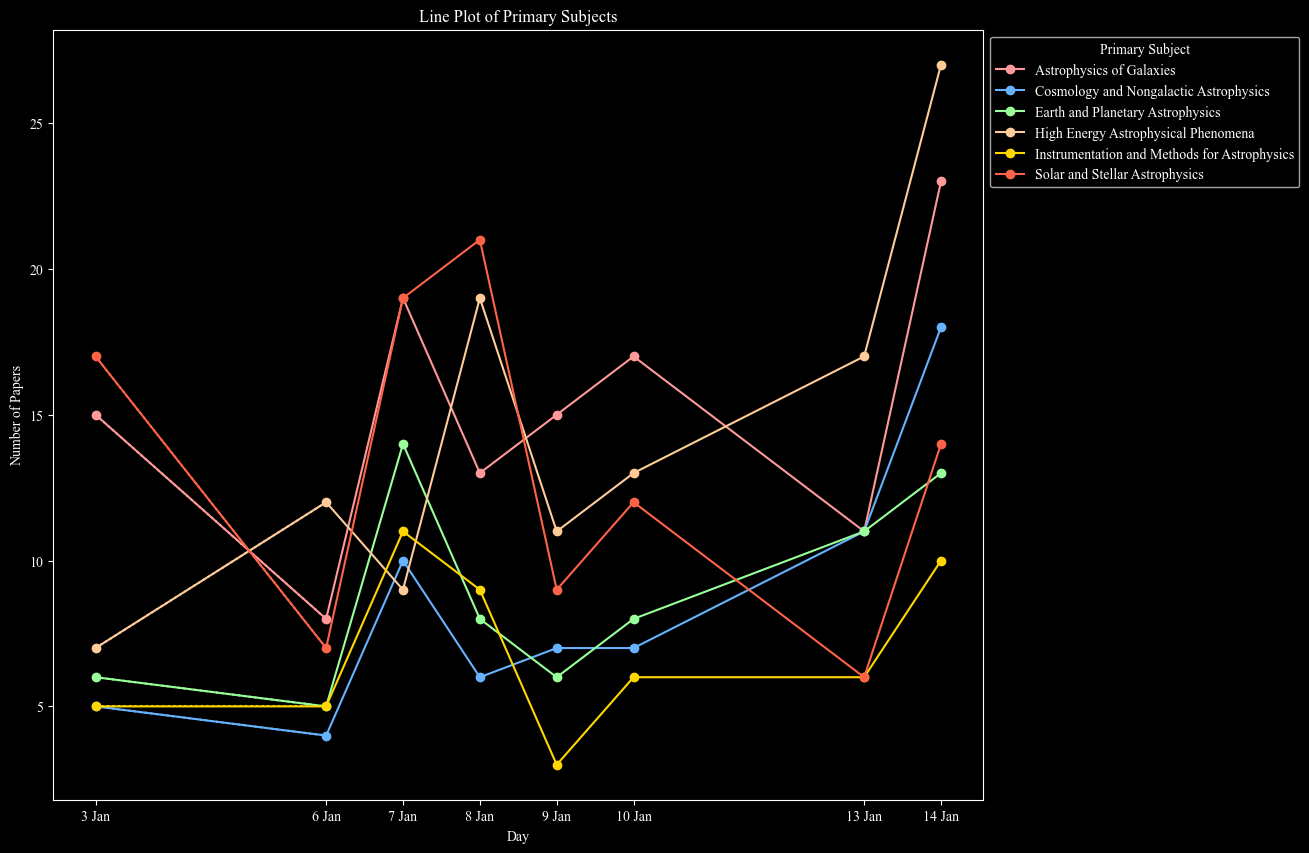

In [7]:
data['date'] = pd.to_datetime(data['date'])
data['day'] = data['date'].dt.day
data['month'] = data['date'].dt.strftime('%b')

subject_counts_per_day = data.groupby(['day', 'primary_subject']).size().unstack(fill_value=0)

colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FFD700', '#FF6347']

fig, ax = plt.subplots(figsize=(12, 10))

for i, subject in enumerate(subject_counts_per_day.columns):
    ax.plot(subject_counts_per_day.index, subject_counts_per_day[subject], color=colors[i], label=subject, marker='o')
    ax.plot([3, 6], [subject_counts_per_day.loc[3, subject], subject_counts_per_day.loc[6, subject]], color=colors[i], linestyle='dotted')

plt.xlabel('Day')
plt.ylabel('Number of Papers')
plt.title('Line Plot of Primary Subjects')

unique_days = data[['day', 'month']].drop_duplicates().sort_values('day')
xticks_labels = [f"{day} {month}" for day, month in zip(unique_days['day'], unique_days['month'])]
plt.xticks(ticks=subject_counts_per_day.index, labels=xticks_labels, rotation=0)

plt.legend(title='Primary Subject', bbox_to_anchor=(1.00, 1), loc='upper left')
plt.show()

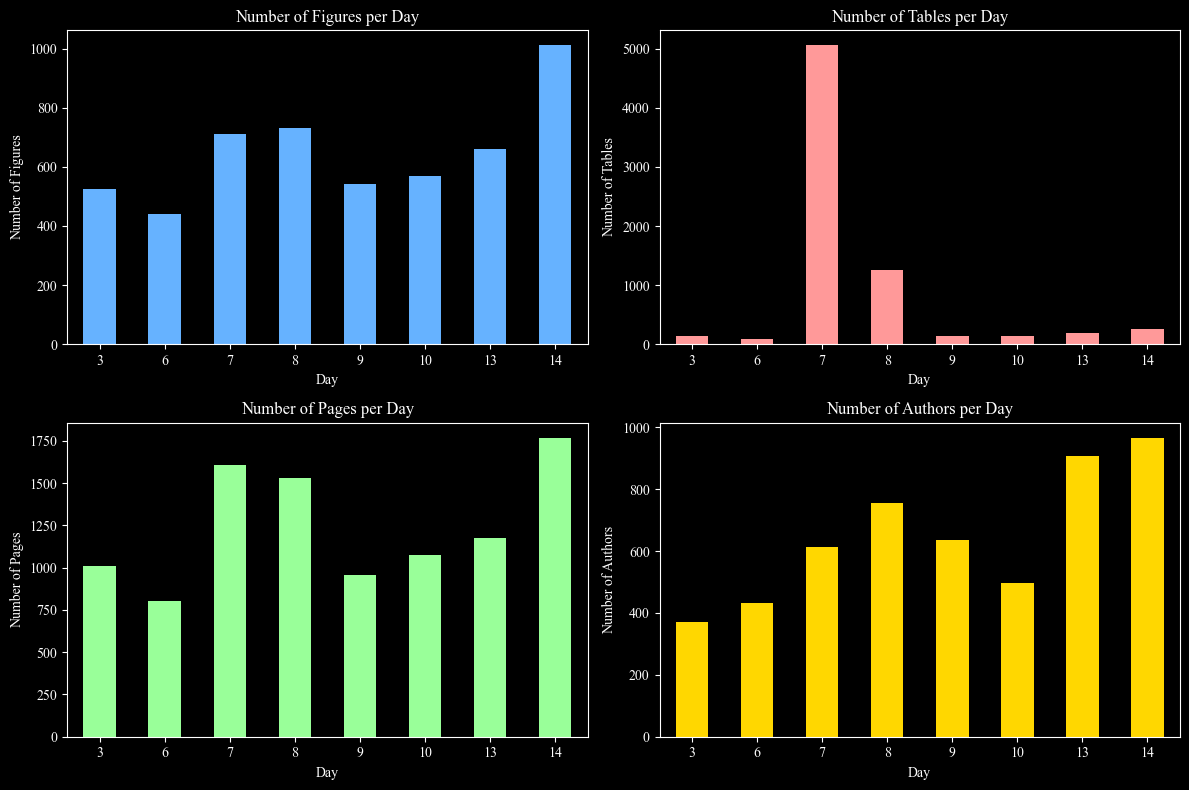

In [8]:
figures_per_day = data.groupby('day')['figures'].sum()
tables_per_day = data.groupby('day')['tables'].sum()
pages_per_day = data.groupby('day')['pages'].sum()
authors_per_day = data.groupby('day')['authors'].apply(lambda x: x.str.split(', ').str.len().sum())

fig, ax = plt.subplots(2, 2, figsize=(12, 8))

figures_per_day.plot(kind='bar', ax=ax[0, 0], color='#66B2FF')
ax[0, 0].set_xlabel('Day')
ax[0, 0].set_ylabel('Number of Figures')
ax[0, 0].set_title('Number of Figures per Day')
ax[0, 0].set_xticks(range(len(figures_per_day)))
ax[0, 0].set_xticklabels(figures_per_day.index, rotation=0)

tables_per_day.plot(kind='bar', ax=ax[0, 1], color='#FF9999')
ax[0, 1].set_xlabel('Day')
ax[0, 1].set_ylabel('Number of Tables')
ax[0, 1].set_title('Number of Tables per Day')
ax[0, 1].set_xticks(range(len(tables_per_day)))
ax[0, 1].set_xticklabels(tables_per_day.index, rotation=0)

pages_per_day.plot(kind='bar', ax=ax[1, 0], color='#99FF99')
ax[1, 0].set_xlabel('Day')
ax[1, 0].set_ylabel('Number of Pages')
ax[1, 0].set_title('Number of Pages per Day')
ax[1, 0].set_xticks(range(len(pages_per_day)))
ax[1, 0].set_xticklabels(pages_per_day.index, rotation=0)

authors_per_day.plot(kind='bar', ax=ax[1, 1], color='#FFD700')
ax[1, 1].set_xlabel('Day')
ax[1, 1].set_ylabel('Number of Authors')
ax[1, 1].set_title('Number of Authors per Day')
ax[1, 1].set_xticks(range(len(authors_per_day)))
ax[1, 1].set_xticklabels(authors_per_day.index, rotation=0)

plt.tight_layout()
plt.show()


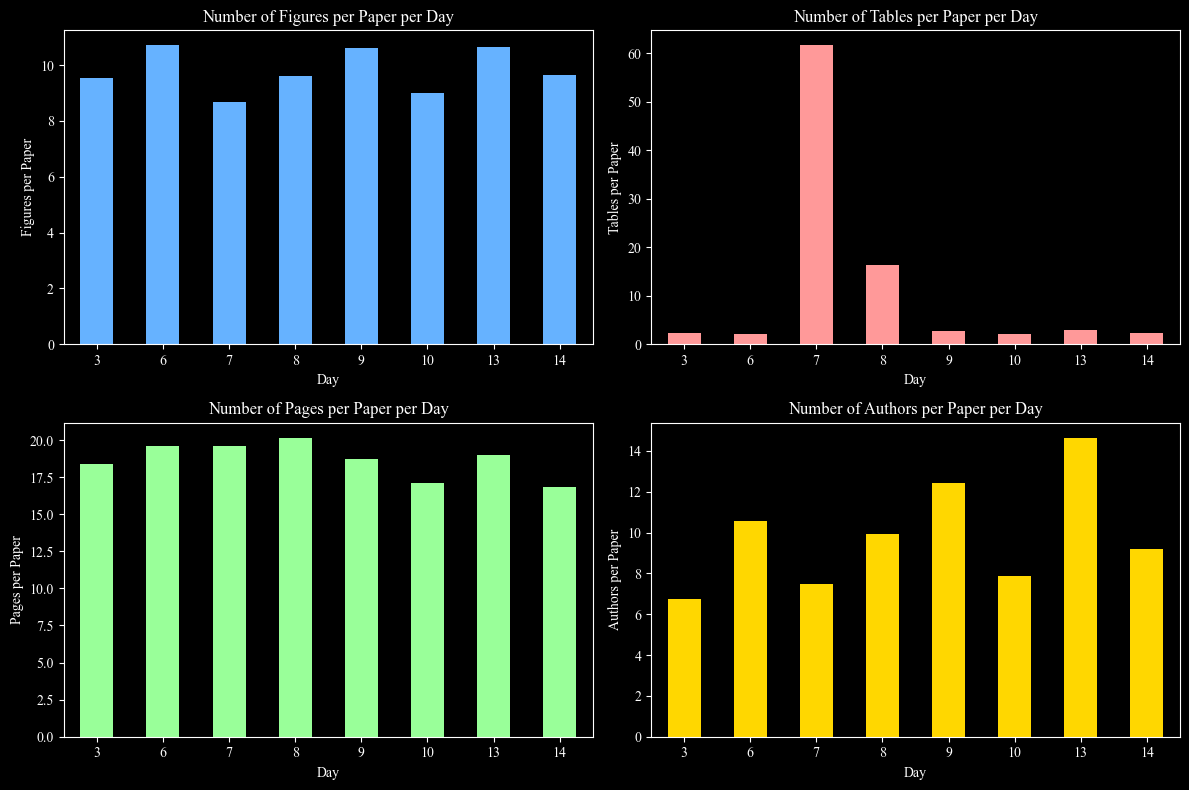

In [9]:
papers_per_day = data.groupby('day').size()

figures_per_paper = figures_per_day / papers_per_day
tables_per_paper = tables_per_day / papers_per_day
pages_per_paper = pages_per_day / papers_per_day
authors_per_paper = authors_per_day / papers_per_day

fig, ax = plt.subplots(2, 2, figsize=(12, 8))

figures_per_paper.plot(kind='bar', ax=ax[0, 0], color='#66B2FF')
ax[0, 0].set_xlabel('Day')
ax[0, 0].set_ylabel('Figures per Paper')
ax[0, 0].set_title('Number of Figures per Paper per Day')
ax[0, 0].set_xticks(range(len(figures_per_paper)))
ax[0, 0].set_xticklabels(figures_per_paper.index, rotation=0)

tables_per_paper.plot(kind='bar', ax=ax[0, 1], color='#FF9999')
ax[0, 1].set_xlabel('Day')
ax[0, 1].set_ylabel('Tables per Paper')
ax[0, 1].set_title('Number of Tables per Paper per Day')
ax[0, 1].set_xticks(range(len(tables_per_paper)))
ax[0, 1].set_xticklabels(tables_per_paper.index, rotation=0)

pages_per_paper.plot(kind='bar', ax=ax[1, 0], color='#99FF99')
ax[1, 0].set_xlabel('Day')
ax[1, 0].set_ylabel('Pages per Paper')
ax[1, 0].set_title('Number of Pages per Paper per Day')
ax[1, 0].set_xticks(range(len(pages_per_paper)))
ax[1, 0].set_xticklabels(pages_per_paper.index, rotation=0)

authors_per_paper.plot(kind='bar', ax=ax[1, 1], color='#FFD700')
ax[1, 1].set_xlabel('Day')
ax[1, 1].set_ylabel('Authors per Paper')
ax[1, 1].set_title('Number of Authors per Paper per Day')
ax[1, 1].set_xticks(range(len(authors_per_paper)))
ax[1, 1].set_xticklabels(authors_per_paper.index, rotation=0)

plt.tight_layout()
plt.show()


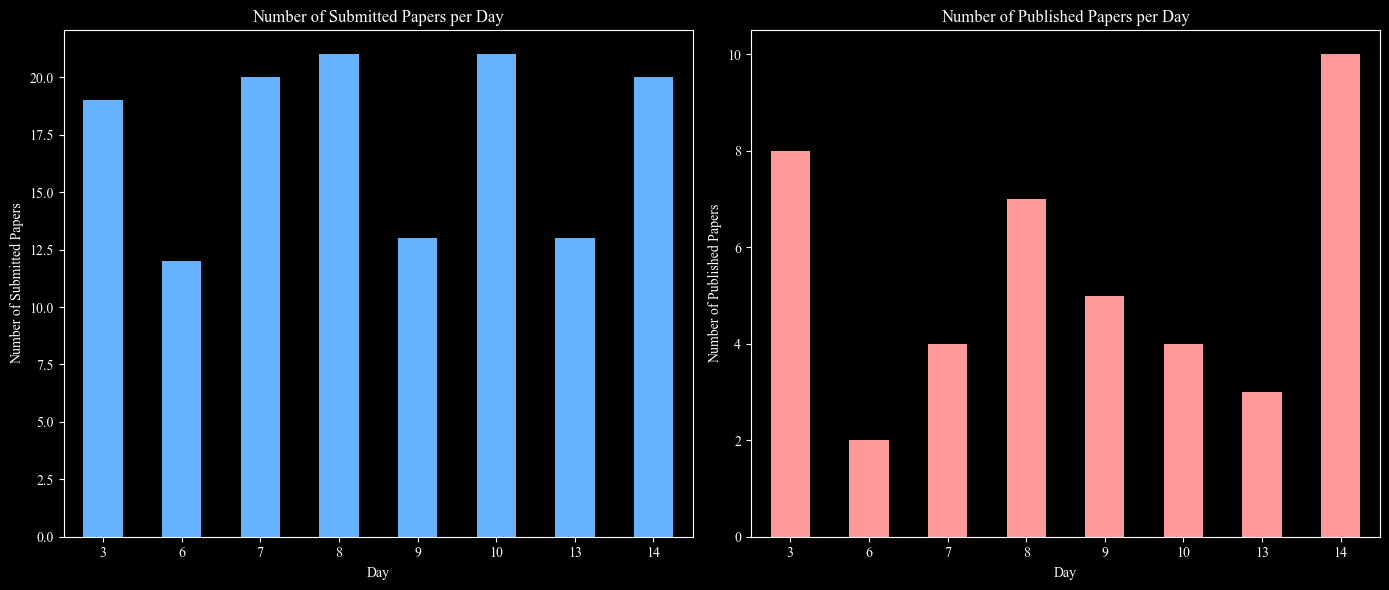

In [10]:
submitted_papers_per_day = data.groupby('day')['submitted_journal'].count()
published_papers_per_day = data.groupby('day')['published_journal'].count()

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

submitted_papers_per_day.plot(kind='bar', ax=ax[0], color='#66B2FF')
ax[0].set_xlabel('Day')
ax[0].set_ylabel('Number of Submitted Papers')
ax[0].set_title('Number of Submitted Papers per Day')
ax[0].set_xticks(range(len(submitted_papers_per_day)))
ax[0].set_xticklabels(submitted_papers_per_day.index, rotation=0)

published_papers_per_day.plot(kind='bar', ax=ax[1], color='#FF9999')
ax[1].set_xlabel('Day')
ax[1].set_ylabel('Number of Published Papers')
ax[1].set_title('Number of Published Papers per Day')
ax[1].set_xticks(range(len(published_papers_per_day)))
ax[1].set_xticklabels(published_papers_per_day.index, rotation=0)

plt.tight_layout()
plt.show()

In [ ]:
keywords = data['keywords'].tolist()

# Flatten the list of keywords and count occurrences
all_keywords = [keyword for sublist in keywords for keyword in sublist.split(', ')]
keyword_counts = Counter(all_keywords)

print(all_keywords)

# Find the most common keyword
most_common_keyword, count = keyword_counts.most_common(1)[0]
print(f"The most repeated keyword is {most_common_keyword} and it was repeated {count} times.")